In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import copy
import utilities
# import 
import scipy.stats as ss
from matplotlib import pyplot as plt

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
import keras
NUM_WORDS=2000 # only use top 1000 words
INDEX_FROM=3   # word index offset


In [155]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)


In [2]:
base_model = keras.models.load_model('./RNN_base_model.h5')


2022-05-17 22:54:53.363377: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# truncate and pad input sequences
max_review_length = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [5]:
scores = base_model.evaluate(X_test, y_test, verbose=1)
print(scores)

782/782 [==============================] - 19s 23ms/step - loss: 1.1075 - accuracy: 0.8541
[1.107534408569336, 0.8540800213813782]


In [6]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[2] ))



<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this has to be one of the worst films of the <UNK> when my friends i were watching this film being the <UNK> audience it was <UNK> at we just sat watched the first half an hour with our <UNK> touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally <UNK> into their <UNK> that they actually paid money they had <UNK> working to watch this <UNK> excuse for a film it must have looked like a great idea on <UNK> but on film it looks like no one in the film has a <UNK> what is going on crap acting crap costumes i can't get across how <UNK> this i

In [7]:
X_train_one_hot = []
for ins in X_train:
    one_hot = np.zeros(2000)
    one_hot[ins] = 1
    X_train_one_hot.append(one_hot)

In [8]:
X_test_one_hot = []
for ins in X_test:
    one_hot = np.zeros(2000)
    one_hot[ins] = 1
    X_test_one_hot.append(one_hot)

In [9]:
X_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,   14,   47,    8,   30,   31,    7,
          4,  249,  108,    7,    4,    2,   54,   61,  369,   13,   71,
        149,   14,   22,  112,    4,    2,  311,   12,   16,    2,   33,
         75,   43, 1829,  296,    4,   86,  320,   35,  534,   19,  263,
          2, 1301,    4, 1873,   33,   89,   78,   12,   66,   16,    4,
        360,    7,    4,   58,  316,  334,   11,    4, 1716,   43,  645,
        662,    8,  257,   85, 1200,   42, 1228,    2,   83,   68,    2,
         15,   36,  165, 1539,  278,   36,   69,    2,  780,    8,  106,
         14,    2, 1338,   18,    6,   22,   12,  2

In [13]:
weights = np.load('RNN_weights_output.npy')
np.shape(weights)

(1, 1, 2000, 1)

In [14]:
weights_importance = weights[0, 0, :, 0]

In [51]:
model.evaluate(X_train, y_train)

782/782 [==============================] - 15s 19ms/step - loss: 0.2533 - accuracy: 0.8979


[0.2532716691493988, 0.8978800177574158]

In [23]:
rnn_weights = base_model.layers[0].weights[0]
rnn_weights

<tf.Variable 'embedding/embeddings:0' shape=(2000, 32) dtype=float32, numpy=
array([[-0.1198127 ,  0.02165966, -0.1500637 , ..., -0.13106845,
        -0.05553406,  0.04520743],
       [-0.18878992, -0.08134112, -0.03905275, ..., -0.0954524 ,
        -0.16307238, -0.01525595],
       [-0.01942877,  0.02867077,  0.00828877, ..., -0.02586515,
         0.03835607, -0.02403784],
       ...,
       [-0.41989487,  0.45781896, -0.3420995 , ..., -0.24855302,
        -0.3724463 ,  0.43562138],
       [ 0.50487024, -0.19321612, -0.17671143, ...,  0.10875862,
        -0.01810301,  0.00321491],
       [-0.17530409, -0.09983381, -0.14499888, ..., -0.16133213,
        -0.03263417, -0.04662052]], dtype=float32)>

In [24]:
rnn_weights = rnn_weights.numpy()

In [5]:
X_train_encoded = numpy.zeros((25000, 200, 2000))

for i in range(len(X_train)):
    for j in range(len(X_train[0])):
        X_train_encoded[i][j][X_train[i][j]] = 1
        


In [62]:
X_test_encoded = numpy.zeros((25000, 200, 2000))

for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        X_test_encoded[i][j][X_test[i][j]] = 1

In [9]:
numpy.shape(X_test)

(25000, 200)

In [19]:
import tensorflow as tf
class Feature_Linear(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Feature_Linear, self).__init__(**kwargs)
        

    def build(self, input_shape):
        if len(input_shape)==2:
            self.w = self.add_weight(
                shape=(1, input_shape[-1]),
                # initializer=tf.keras.initializers.RandomUniform(minval=3, seed=42),
                initializer=tf.keras.initializers.RandomUniform(),
                # initializer=tf.keras.initializers.Zeros(),
                trainable=True,
                # constraint=lambda x: tf.clip_by_value(x, -1, 1)
            )
        else:
            self.w = self.add_weight(
                shape=(2000, 1),
                initializer=tf.keras.initializers.Zeros(),
                trainable=True,
                # constraint=lambda x: tf.clip_by_value(x, 0, 1)
            )

    def get_config(self):
        config = super().get_config()
        return config

    def call(self, inputs, **kwargs):
        weights = tf.multiply(rnn_weights, self.w)
        return tf.matmul(inputs, weights)


In [58]:
feature_model.layers[1].set_weights(model.layers[1].get_weights())

In [59]:
feature_model.layers[2].set_weights(model.layers[2].get_weights())

In [ ]:
feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
feature_model.fit(X_train_encoded[:5000], y_train[:5000], epochs=3, batch_size=64, verbose=1)


In [25]:
import tensorflow as tf

feature_model = tf.keras.models.load_model("RNN_feature_model.h5", custom_objects={'Feature_Linear': Feature_Linear})


In [26]:
feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature__linear (Feature_Lin (None, 200, 32)           2000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 55,301
Trainable params: 2,000
Non-trainable params: 53,301
_________________________________________________________________


In [27]:
feature_model.layers[0].weights

[<tf.Variable 'feature__linear/Variable:0' shape=(2000, 1) dtype=float32, numpy=
 array([[-0.14786531],
        [ 0.3428153 ],
        [-0.42517176],
        ...,
        [-0.04327567],
        [ 0.04119211],
        [ 0.09218749]], dtype=float32)>]

In [ ]:
# Final evaluation of the model
scores = feature_model.evaluate(X_test_encoded, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [75]:
import keras
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(num_words=5000, skip_top=50)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [76]:
decoded_words = " ".join(inverted_word_index[i] for i in range(1,5000))
decoded_words

"the and a of to is br in it i this that was as for with movie but film on not you are his have he be one all at by an they who so from like her or just about it's out has if some there what good more when very up no time she even my would which only story really see their had can were me well than we much been bad get will do also into people other first great because how him most don't made its then way make them too could any movies after think characters watch two films character seen many being life plot never acting little best love over where did show know off ever does better your end still man here these say scene while why scenes go such something through should back i'm real those watching now though doesn't years old thing actors work 10 before another didn't new funny nothing actually makes director look find going few same part again every lot cast us quite down want world things pretty young seems around got horror however can't fact take big enough long thought that's b

In [19]:
rank = feature_model.layers[0].weights[0].numpy()
rank = numpy.abs(numpy.subtract(rank, 1))

In [50]:
rank = numpy.reshape(rank, (len(rank)))
print(rank)
a = rank.argsort()[-100:]
a

[1.1478653 0.6571847 1.4251717 ... 1.0432757 0.9588079 0.9078125]


array([ 513, 1169,  309,  724,  828,  858, 1179,   34, 1679,    4, 1212,
        652,  658,  324,   29,  529,   68,  696,  422,  613, 1160,  760,
       1951, 1260, 1873,  341, 1645,  687,  965, 1041,   35,  173, 1286,
        553,  270,  260,   79,  546,  366,  245,   19,  872, 1471,   51,
          0,  618, 1205,  561,  240, 1902,  388,  393, 1400,  190,  313,
         33, 1849,  637,  633,  136,  137,   74, 1376,  419,  268,  914,
        117,  315, 1673,  534,   63,  722, 1288,   56,  588,  291,  972,
       1112,  194,  220,  492, 1577,   65,  337,  625,  430,  516,  703,
        445,  799,  541, 1099,  628,  605,   15,  555,    2,   11,   36,
         21])

In [29]:
FI_words = " ".join(inverted_word_index[i] for i in a)
FI_words

'really upon thinks she please someone joke violent thought family works offers their completely david worse car cheap based editing voice moves english ok for god and this from not'

In [39]:
Case_words = " ".join(inverted_word_index[i] for i in x_train[0])
Case_words

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

In [16]:
INDEX_FROM=3 

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3


word_to_id={k:(v+INDEX_FROM-1) for k,v in word_to_id.items()}

id_to_word = {value:key for key,value in word_to_id.items()}
# print(id_to_word)

# print(' '.join(id_to_word[id] for id in a ))

### Prove it - important words bank

In [ ]:
tf-idf

### WordCloud

## Next Project - RNN in abstract

### Random Forest

In [15]:
model_rf = RandomForestClassifier(random_state=3)
model_rf.fit(X_train_one_hot, y_train)
FI_RF = model_rf.feature_importances_

### Permutation method

#### Change each word in the word bank in each sentance randomly.

In [16]:
weights_perm = np.load('RNN_perm_output.npy')
rank = weights_perm[:,0]
rank

array([3.85809779e-01, 1.41579332e-02, 6.89648271e-01, ...,
       4.94871114e-04, 7.00585719e-04, 5.89552335e-04])

In [78]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(show_cols+1):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.ylabel('Ranking', fontsize=12)

    plt.bar(x_val, w_lr_sort)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(show_cols+1):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)
    plt.ylabel('Ranking', fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos




In [17]:
weights1 = np.load('RNN_weights_output_1.npy')
weights2 = np.load('RNN_weights_output_2.npy')
weights1 = weights1.reshape((1000,2000))
weights2 = weights2.reshape((1000,2000))
np.shape(weights1)

(1000, 2000)

In [18]:
weights_out = np.concatenate((weights1, weights2))

In [19]:
weights_std = np.std(weights_out, axis=0)
weights_std

array([0.00061151, 0.04106976, 0.06509471, ..., 0.0843712 , 0.06504337,
       0.04813837], dtype=float32)

In [20]:
weights_mean = weights_out.mean(axis=0)
weights_mean

array([0.09645646, 0.38612035, 0.82791466, ..., 0.23346642, 0.0073278 ,
       0.05645176], dtype=float32)

In [21]:
weights_scaled = np.abs(np.subtract(weights_out, 1)).mean(axis=0)
weights_scaled

array([0.90354425, 0.6138798 , 0.1723628 , ..., 0.7665343 , 0.9926729 ,
       0.9435478 ], dtype=float32)

In [22]:
weights_importance = np.abs((weights_mean)/(weights_std*weights_scaled))

/var/folders/92/lnpv663963531g350q66gj300000gn/T/ipykernel_24095/583969378.py:1: RuntimeWarning: invalid value encountered in true_divide
  weights_importance = np.abs((weights_mean)/(weights_std*weights_scaled))


In [23]:
from scipy.linalg import lu
from scipy.linalg import solve

weights_out = np.insert(weights_out, 0, np.ones(2000), 0)
pl, weights_contribution = lu(weights_out, permute_l=True)

In [25]:
weights_cc = solve(weights_contribution[:2001], np.ones(2000))
out

array([238.74075952, -11.28891831,   3.53507014, ...,  -0.47062375,
        -1.26654444,   0.97378652])

In [188]:
def feature_selection(X, feature_importance, percent):
    feature_importance = np.nan_to_num(feature_importance)
    index = np.percentile(feature_importance, [percent])
        
    index_list = np.where(feature_importance>index)
    index_list = np.reshape(index_list, (len(index_list[0])))
    X_train=[]
    for i in X:
        i = np.array(i)
        i = np.where(np.isin(i, index_list), 0, i)
        i = np.reshape(i, (len(i))).tolist()
        X_train.append(i)
    return X_train




In [189]:
importance = [weights_importance, weights_cc, FI_RF, rank]
output = {}
# truncate and pad input sequences
for i in [40, 60, 80]:
    for index, j in enumerate(importance):
        X_train_important = feature_selection(X_train, j, i)
        X_test_important = feature_selection(X_test, j, i)
        max_review_length = 200
        X_train = sequence.pad_sequences(X_train_important, maxlen=max_review_length)
        X_test = sequence.pad_sequences(X_test_important, maxlen=max_review_length)
        embedding_vecor_length = 32
        base_model = Sequential()
        base_model.add(Embedding(NUM_WORDS, embedding_vecor_length, input_length=max_review_length))
        base_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
        base_model.add(Dense(1, activation='sigmoid'))
        base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        base_model.summary()
        name = i+index
        output[name]=base_model.fit(X_train, y_train, epochs=5, batch_size=128)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 200, 32)           64000     
                                                                 
 lstm_13 (LSTM)              (None, 128)               82432     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 146,561
Trainable params: 146,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 [==============================] - 98s 476ms/step - loss: 0.6934 - accuracy: 0.4993
Epoch 2/5
196/196 [==============================] - 92s 469ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 3/5
196/196 [==============================] - 90s 460ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch

 embedding_20 (Embedding)    (None, 200, 32)           64000     
                                                                 
 lstm_19 (LSTM)              (None, 128)               82432     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 146,561
Trainable params: 146,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 [==============================] - 75s 364ms/step - loss: 0.6934 - accuracy: 0.4980
Epoch 2/5
196/196 [==============================] - 70s 356ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 3/5
196/196 [==============================] - 69s 352ms/step - loss: 0.6932 - accuracy: 0.5037
Epoch 4/5
196/196 [==============================] - 69s 353ms/step - loss: 0.6933 - accuracy: 0.4994
Epoch 5/5
196/196 [==============================] - 69s 3

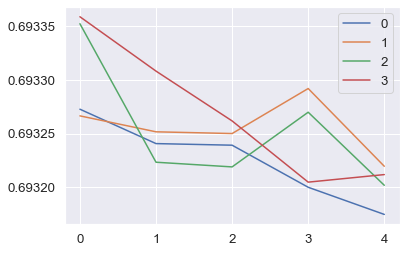

In [194]:
plt.plot(output[60].history['loss'], label=0)
plt.plot(output[61].history['loss'], label=1)
plt.plot(output[62].history['loss'], label=2)
plt.plot(output[63].history['loss'], label=3)
plt.legend()